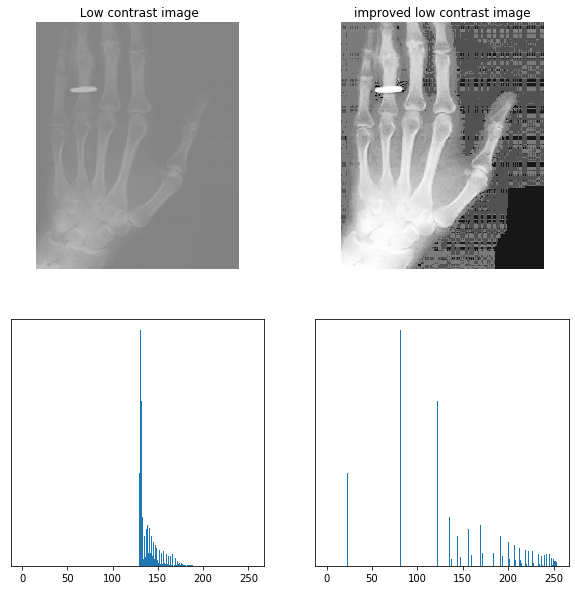

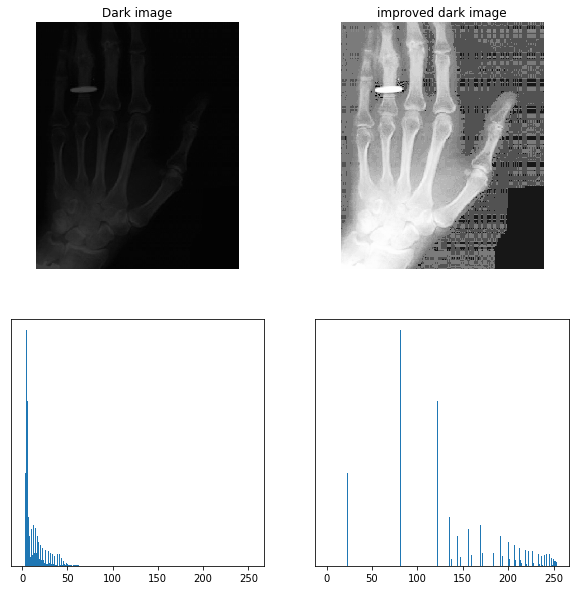

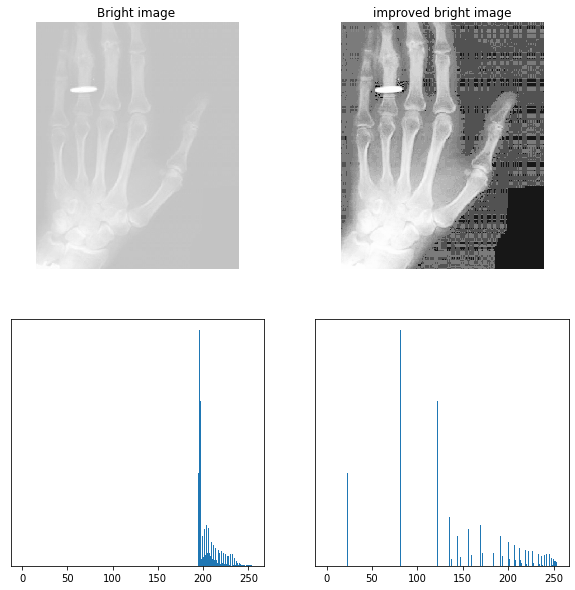

In [11]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

#A

def normalize_histogram(img):
   
    n = np.zeros(256)   
    p = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range (img.shape[1]):
            n[img[i,j]]+=1
            p[img[i,j]]=n[img[i,j]]/(img.shape[0]*img.shape[1])
           
    return p 

#B

def histogram_equalization(img):
    
    s = np.zeros(256)
    p = normalize_histogram(img)
    
    for i in range(256):
        for j in range(i+1):
            s[i]=s[i]+p[j]
            
    for i in range(256):
        s[i] = 255*s[i]
        s[i] = s[i].astype('uint8')
         
        
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            n = img[i,j] 
            img[i,j] = s[img[i,j]]

    return img   
            
#C

# first image
img_lc = cv.imread('Lowcontrast.tif')
img1 = img_lc.copy()
img1 = histogram_equalization(img1)
fig , ax = plt.subplots(2,2,figsize=(10,10))

ax = plt.subplot(2,2,1)
ax.imshow(img_lc, cmap = 'gray', vmin=0 , vmax=255)
ax.axis('off')
ax.set_title(' Low contrast image')       

ax = plt.subplot(2,2,2)
ax.imshow(img1, cmap = 'gray', vmin=0 , vmax=255)
ax.axis('off')
ax.set_title('improved low contrast image')

ax = plt.subplot(2,2,3)
ax.hist(img_lc.ravel() , bins = 256 , range = (0 , 255))
ax.axes.get_yaxis().set_visible(False)
        
ax = plt.subplot(2,2,4)
ax.hist(img1.ravel() , bins = 256 )
ax.axes.get_yaxis().set_visible(False)
    
# second image
img_d = cv.imread('Dark.tif')
img2 = img_d.copy()
img2 = histogram_equalization(img2)
fig , ax = plt.subplots(2,2,figsize=(10,10))

ax = plt.subplot(2,2,1)
ax.imshow(img_d, cmap = 'gray', vmin=0 , vmax=255)
ax.axis('off')
ax.set_title('Dark image')        

ax = plt.subplot(2,2,2)
ax.imshow(img2, cmap = 'gray', vmin=0 , vmax=255)
ax.axis('off')
ax.set_title('improved dark image')

ax = plt.subplot(2,2,3)
ax.hist(img_d.ravel() , bins = 256 ,range = (0 , 255)  )
ax.axes.get_yaxis().set_visible(False)
        
ax = plt.subplot(2,2,4)
ax.hist(img2.ravel() , bins = 256 )
ax.axes.get_yaxis().set_visible(False)
  
# third image
img_b = cv.imread('Bright.tif')
img3 = img_b.copy()
img3 = histogram_equalization(img3)
fig , ax = plt.subplots(2,2,figsize=(10,10))

ax = plt.subplot(2,2,1)
ax.imshow(img_b, cmap = 'gray', vmin=0 , vmax=255)
ax.axis('off')
ax.set_title('Bright image ')        

ax = plt.subplot(2,2,2)
ax.imshow(img3, cmap = 'gray', vmin=0 , vmax=255)
ax.axis('off')
ax.set_title('improved bright image')

ax = plt.subplot(2,2,3)
ax.hist(img_b.ravel() , bins = 256 , range = (0 , 255))
ax.axes.get_yaxis().set_visible(False)
        
ax = plt.subplot(2,2,4)
ax.hist(img3.ravel() , bins = 256 )
ax.axes.get_yaxis().set_visible(False)
    
    
cv.waitKey(0)
cv.destroyAllWindows()